In [1]:
## 1D heat equation using scipy fft

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams.update({'font.size':18})


c = 1
L = 25
N = 620
dx = L/N
dy = L/N
x = np.arange(0,L,dx)
y = np.arange(0,L,dy)

In [2]:
omega_x = np.pi*np.fft.fftfreq(N,d =0.1) # 2*pi*omega
omega_y = np.pi*np.fft.fftfreq(N,d =0.1)

In [3]:
u_initial = np.zeros((len(x),len(y)))
u_initial[N-1] = 250
ux_initial = u_initial[N-1]
uy_initial = u_initial[0:N,0]

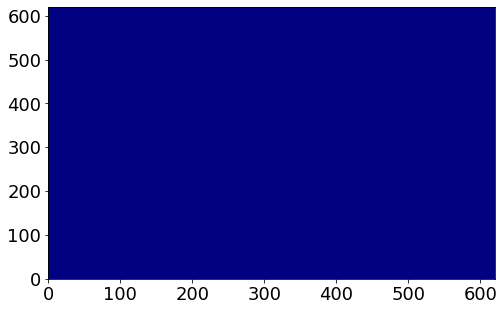

In [4]:
uy_transpose = uy_initial.reshape((N,1))
u_soln = (np.dot(uy_transpose, ux_initial.reshape(1,N)))
plt.pcolormesh(u_soln, cmap=plt.cm.jet, vmin=0, vmax=30)

In [5]:
from scipy import fft
##fft for x
ux_ft = fft.dst(ux_initial)

#fft for y
uy_ft = fft.dst(uy_initial)


In [6]:
dt = 0.1
t = np.arange(0,20,dt)

In [7]:
def rhs_diff_eqn_x(u_ftRI_coeff,t,omega_x,c):

##for fft2
    #u_ft = u_ftRI_coeff[:N] + (1j)*u_ftRI_coeff[N:]
    d_uft = -c**2 * (np.power(omega_x,2))*u_ftRI_coeff + (np.sqrt(2/np.pi))*omega_x*250
    #d_uftRI_coeff  =np.concatenate((d_uft.real,d_uft.imag)).astype('float64')
    return d_uft
def rhs_diff_eqn_y(u_ftRI_coeff,t,omega_y,c):

##for fft2
    #u_ft = u_ftRI_coeff[:N] + (1j)*u_ftRI_coeff[N:]
    d_uft = -c**2 * (np.power(omega_x,2))*u_ftRI_coeff
    #d_uftRI_coeff  =np.concatenate((d_uft.real,d_uft.imag)).astype('float64')
    return d_uft

In [8]:
usoln_ftRI_coeff_x = odeint(rhs_diff_eqn_x, ux_ft,t,args= (omega_x,c))
usoln_ftRI_coeff_y = odeint(rhs_diff_eqn_y, uy_ft,t,args= (omega_y,c))

In [9]:
ux_sol = usoln_ftRI_coeff_x
ux_soln=[]
for k in range(len(t)):
    ux_soln.append(fft.idst(ux_sol[k,:]))

uy_sol = usoln_ftRI_coeff_y
uy_soln=[]
for k in range(len(t)):
    uy_soln.append(fft.idst(uy_sol[k,:]))

In [10]:
# for i,j in enumerate(t):
#     uy_transpose = uy_soln[i].reshape((N,1))
#     u_soln = (np.dot(uy_transpose, ux_soln[i].reshape(1,N)))
#     plt.pcolormesh(u_soln, cmap=plt.cm.jet, vmin=0, vmax=30)
# plt.colorbar()
# plt.show()

Text(0.5, 1.0, 't = 20s')

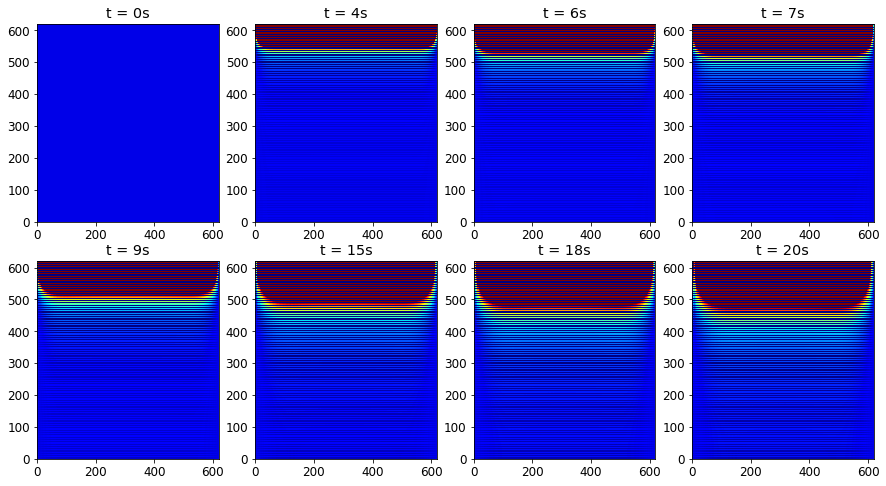

In [11]:
plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams.update({'font.size':12})
fig, axs = plt.subplots(2, 4)
axs[0, 0].pcolormesh(np.dot(uy_soln[0].reshape((N,1)), ux_soln[0].reshape(1,N)), cmap=plt.cm.jet, vmin=-10, vmax=100)
axs[0, 0].set_title('t = 0s')
axs[0, 1].pcolormesh(np.dot(uy_soln[40].reshape((N,1)), ux_soln[40].reshape(1,N)), cmap=plt.cm.jet, vmin=-10, vmax=100)
axs[0, 1].set_title('t = 4s')
axs[0, 2].pcolormesh(np.dot(uy_soln[60].reshape((N,1)), ux_soln[60].reshape(1,N)), cmap=plt.cm.jet, vmin=-10, vmax=100)
axs[0, 2].set_title('t = 6s')
axs[0, 3].pcolormesh(np.dot(uy_soln[70].reshape((N,1)), ux_soln[70].reshape(1,N)), cmap=plt.cm.jet, vmin=-10, vmax=100)
axs[0, 3].set_title('t = 7s')

axs[1, 0].pcolormesh(np.dot(uy_soln[90].reshape((N,1)), ux_soln[90].reshape(1,N)), cmap=plt.cm.jet, vmin=-10, vmax=100)
axs[1, 0].set_title('t = 9s')
axs[1, 1].pcolormesh(np.dot(uy_soln[150].reshape((N,1)), ux_soln[150].reshape(1,N)), cmap=plt.cm.jet, vmin=-10, vmax=100)
axs[1, 1].set_title('t = 15s')
axs[1, 2].pcolormesh(np.dot(uy_soln[180].reshape((N,1)), ux_soln[180].reshape(1,N)), cmap=plt.cm.jet, vmin=-10, vmax=100)
axs[1, 2].set_title('t = 18s')
axs[1, 3].pcolormesh(np.dot(uy_soln[199].reshape((N,1)), ux_soln[199].reshape(1,N)), cmap=plt.cm.jet, vmin=-10, vmax=100)
axs[1, 3].set_title('t = 20s')
